In [1]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

from functools import reduce

In [2]:
#import warnings to filter warnings
import warnings
warnings.filterwarnings('ignore')

## Read and load data

##### Loading the country data from csv

In [3]:
country_data = pd.read_csv("Country-data.csv", encoding="unicode_escape")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Inspecting country_data dataframe (shape, info, describe etc.) 

In [4]:
country_data.size

1670

In [5]:
country_data.shape

(167, 10)

The data set has 167 rows and 10 columns

In [6]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- All the columns in the dataset are of numeric type, except for country
- No converison of data type for any column is required

#### All the columns in the dataset have 167 values. To conclude, there are no null values in the dataset

In [7]:
country_data.describe([.25, .5, .75, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Some columns have a significant gap between 99% and max, indicating presence of outliers.

### Inspecting the country_data dataframe. Calculating the null percentages in each column

In [8]:
round(100*(country_data.isnull().sum()/len(country_data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

As observed earlier, none of the columns have any null values

#### As mentioned in the data description, the columns exports, health and imports have been given as percentage of gdpp. We need the absolute values in each column, hence, converting these columns to their absolute values.

In [9]:
country_data['exports'] = country_data['exports'] * country_data['gdpp'] / 100
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
country_data['health'] = country_data['health'] * country_data['gdpp'] / 100
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,58.9,19100,1.44,76.8,2.13,12200


In [11]:
country_data['imports'] = country_data['imports'] * country_data['gdpp'] / 100
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Exploratory Data Analysis

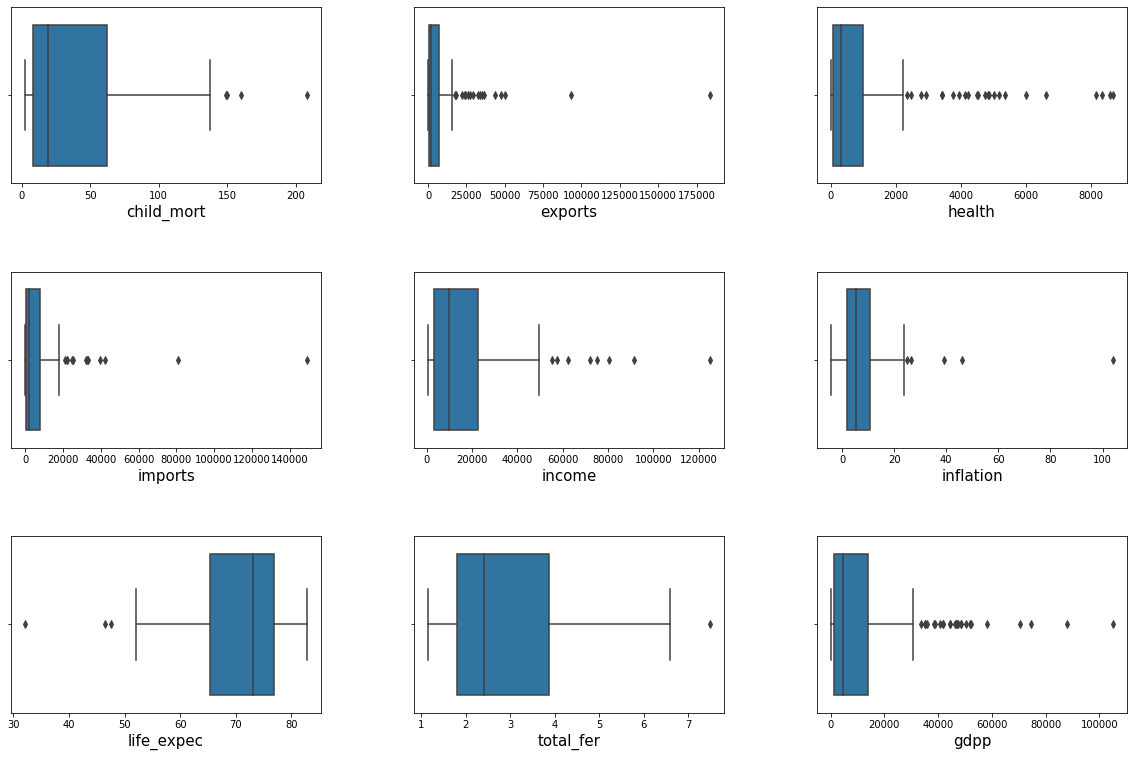

In [12]:
cols = country_data.columns
counter = 1
fig=plt.figure(figsize=(20,20))
plt.subplots_adjust(top = 0.50, bottom=0.01, hspace=0.5, wspace=0.3)
columns = 3
rows = 3
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    sns.boxplot(x=str(cols[counter]), data=country_data) 
    plt.xlabel(str(cols[counter]), fontsize=15)
    counter += 1
plt.show()

### child_mort
#### As observered from the boxplot, 
- there are some countries with very high child mortality rate, over 150
- 75% of the countries have child mortality rate below 60

### exports
#### As observered from the boxplot, 
- Average of exports of goods and services per capita for all countries is 7420
- The exports per capita ranges from 1 to 183750
- Some countries have very high values of exports, above 64794
- Exports have a very narrow IQR range

### health
#### As observered from the boxplot, 
- Average of Total health spending per capita for all countries is 1056
- The health per capita ranges from 12 to 8663
- Some countries have very high values of health expense, above 8410
- Health have a narrow IQR range

### imports
#### As observered from the boxplot, 
- Average of Imports of goods and services per capita for all countries is 6588
- The imports per capita ranges from 0 to 149100
- Some countries have very high values of imports, above 55371
- imports have a very narrow IQR range

### income
#### As observered from the boxplot, 
- Average of income per person for all countries is 17144
- Some countries have very high values of income, above 50000

### inflation
#### As observered from the boxplot, 
- Average of inflation for all countries is around 5
- The inflation ranges from -5 to 105
- Some countries have high values of inflation, above 25

### life_expec
#### As observered from the boxplot, 
- Average of life_expec for all countries is around 72
- The life_expec ranges from 32 to 83
- Some countries have low values of life_expec, below 52

### total_fer
#### As observered from the boxplot, 
- Average of children that would be born to each woman for all countries is around 2
- The total_fer ranges from 1 to 8
- One countries has high values of total_fer, above 7

### gdpp
#### As observered from the boxplot, 
- Average of GDP per capita for all countries is around 12964
- The gdpp ranges from 231 to 105000
- Some countries have high values of gdpp, above 79088

## Bi-variate analysis

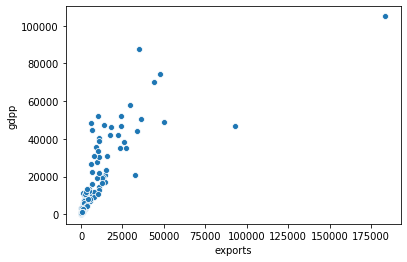

In [13]:
#exports vs gdpp
sns.scatterplot(x = 'exports', y = 'gdpp', legend = 'full', data = country_data, palette='Set1')

#### As observed from plot,
- There seem to be a linear positive relationship between exports and gdpp, which makes sense
- There is one country which has very high exports and very high gdpp

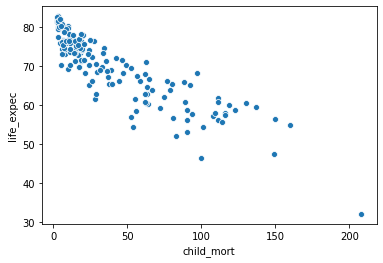

In [14]:
#child_mort vs life_expec
sns.scatterplot(x = 'child_mort', y = 'life_expec', legend = 'full', data = country_data, palette='Set1')

#### As observed from plot,
- There seem to be a negative linear relationship between life_expec and child_mort, which is obvious, as child_mort increasess, life expentancey decreases
- There is one country which has very high child_mort and very low life_expec

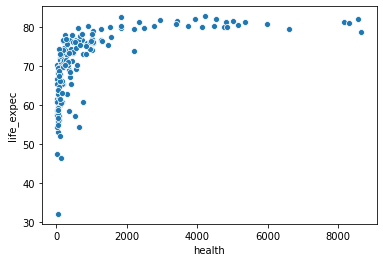

In [15]:
#life_expec vs health
sns.scatterplot(x = 'health', y = 'life_expec', legend = 'full', data = country_data, palette='Set1')

#### As observed from plot,
- There seem to be a non linear relationship between life_expec and health, with a slight increase in health, life_expec increases significantly

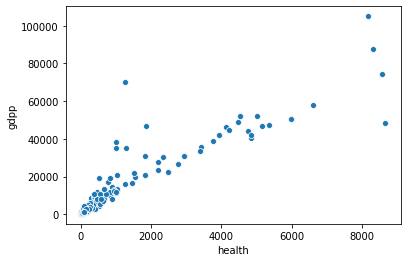

In [16]:
#health vs gdpp
sns.scatterplot(x = 'health', y = 'gdpp', legend = 'full', data = country_data, palette='Set1')

#### As observed from plot,
- There seem to be a somewhat positive linear relationship between health and gdpp, as health increases, gdpp also increases

## Multi-variate analysis

In [17]:
corr= round(country_data.drop('country', axis=1).corr(),3)
corr

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000,-0.297,-0.430,-0.319,-0.524,0.288,-0.887,0.848,-0.483
exports,-0.297,1.000,0.613,0.988,0.725,-0.142,0.378,-0.291,0.769
health,-0.430,0.613,1.000,0.639,0.691,-0.254,0.546,-0.408,0.917
imports,-0.319,0.988,0.639,1.000,0.672,-0.179,0.398,-0.317,0.755
income,-0.524,0.725,0.691,0.672,1.000,-0.148,0.612,-0.502,0.896
inflation,0.288,-0.142,-0.254,-0.179,-0.148,1.000,-0.240,0.317,-0.222
life_expec,-0.887,0.378,0.546,0.398,0.612,-0.240,1.000,-0.761,0.600
total_fer,0.848,-0.291,-0.408,-0.317,-0.502,0.317,-0.761,1.000,-0.455
gdpp,-0.483,0.769,0.917,0.755,0.896,-0.222,0.600,-0.455,1.000


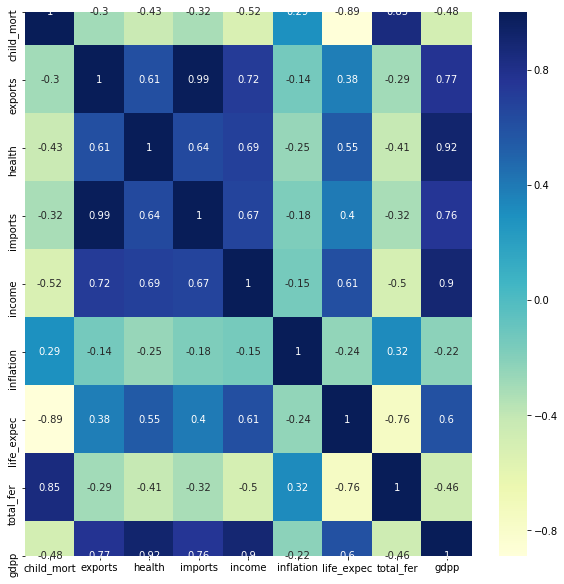

In [18]:
plt.figure(figsize=(10,10))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

#### As observed from plot,
- Some columns have a high correlation between them, greater than 0.7
- total_fer and child_mort, total_fer and life_expec have high positive correlation

## Outlier treatment
#### Using inter quantile method

In [19]:
def CapOutliers(ColName, LowerCap, UpperCap):
    Q1 = country_data[ColName].quantile(LowerCap)
    Q4 = country_data[ColName].quantile(UpperCap)
    country_data[ColName][country_data[ColName] <= Q1] = Q1
    country_data[ColName][country_data[ColName] >= Q4] = Q4

In [20]:
CapOutliers('child_mort', 0.01, 0.99)
CapOutliers('exports', 0.01, 0.99)
CapOutliers('health', 0.01, 0.99)
CapOutliers('imports', 0.01, 0.99)
CapOutliers('income', 0.01, 0.99)
CapOutliers('inflation', 0.01, 0.99)
CapOutliers('life_expec', 0.01, 0.99)
CapOutliers('total_fer', 0.01, 0.99)
CapOutliers('gdpp', 0.01, 0.99)

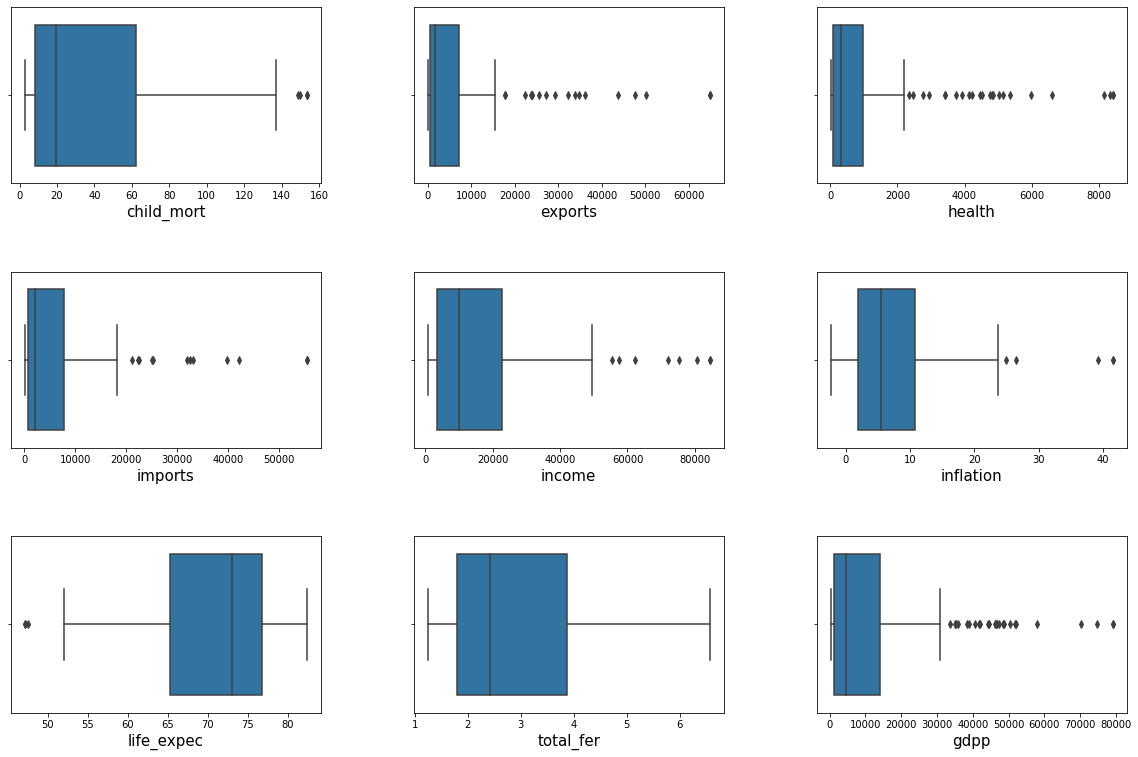

In [21]:
cols = country_data.columns
counter = 1
fig=plt.figure(figsize=(20,20))
plt.subplots_adjust(top = 0.50, bottom=0.01, hspace=0.5, wspace=0.3)
columns = 3
rows = 3
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    sns.boxplot(x=str(cols[counter]), data=country_data) 
    plt.xlabel(str(cols[counter]), fontsize=15)
    counter += 1
plt.show()

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [22]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country_data.drop('country', axis =1))

0.939965533984905

#### Since the Hopkins score is higher than 90%, we can perform clustering

## Scaling using Standard scaler

In [24]:
num_country_data = country_data.drop(['country'], axis = 1)

num_country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
#instantiate scaler
scaler = StandardScaler()

#fit_transform
num_country_data_scaled = scaler.fit_transform(num_country_data)
num_country_data_scaled

array([[ 1.34401227, -0.56963804, -0.56698288, ..., -1.69379898,
         1.92692802, -0.70231404],
       [-0.54754345, -0.47387318, -0.44041711, ...,  0.66305283,
        -0.86591134, -0.49877488],
       [-0.27254826, -0.42401465, -0.48629503, ...,  0.68650409,
        -0.03542674, -0.47748297],
       ...,
       [-0.3753502 , -0.49162206, -0.54027452, ...,  0.28783264,
        -0.66498765, -0.65875194],
       [ 0.47276581, -0.53996578, -0.55245405, ..., -0.36880269,
         1.15672052, -0.65875194],
       [ 1.16153882, -0.52703195, -0.54229642, ..., -2.18627548,
         1.64563484, -0.65012008]])

In [27]:
country_data_scaled = pd.DataFrame(num_country_data_scaled)
country_data_scaled.columns = [col for col in num_country_data.columns]
country_data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


# K-means clustering

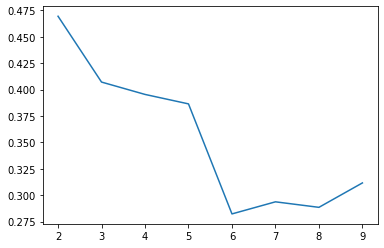

In [28]:
#silhouette_score analysis
from sklearn.metrics import silhouette_score
scores = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(country_data_scaled)
    scores.append([k, silhouette_score(country_data_scaled, kmeans.labels_)])
    
plt.plot(pd.DataFrame(scores)[0], pd.DataFrame(scores)[1]);

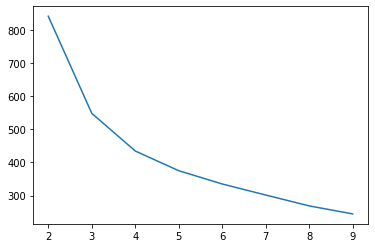

In [29]:
#elbow curve analysis
elbow_score = []
for k in list(range(2,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(country_data_scaled)
    elbow_score.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(elbow_score)[0], pd.DataFrame(elbow_score)[1]);

### From the above plots of elbow curve and silhouette score, we choose k = 3

In [30]:
#perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(country_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [31]:
kmean_prediction = country_data.copy()

#adding cluster id to this copy of original data
kmean_prediction['cluster_id']=kmean.labels_

kmean_prediction.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [32]:
kmean_prediction['cluster_id'].value_counts()

2    90
1    48
0    29
Name: cluster_id, dtype: int64

### Visualising the clusters

#### using child_mort, income and gdpp

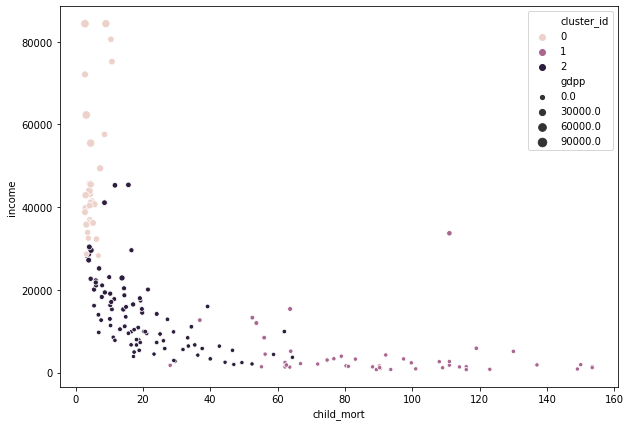

In [33]:
plt.figure(figsize=[10,7])
sns.scatterplot(x = 'child_mort', y = 'income', size = 'gdpp', hue = 'cluster_id', data = kmean_prediction)
plt.show()

### From the above plot, it is evident that,
- cluster 0: High gdpp, High income, low child_mort
- cluster 1: Low gdpp, Low income, high child_mort
- cluster 2: Medium gdpp, Medium income, low child_mort

### Cluster profiling

#### using child_mort, income and gdpp

In [34]:
kmean_prediction[['child_mort', 'income', 'gdpp', 'cluster_id']].groupby('cluster_id').mean()

,child_mort,income,gdpp
cluster_id,,,
0,4.989655,47784.413793,46068.137931
1,90.335417,3901.010000,1911.400833
2,20.547778,13804.333333,7808.577778


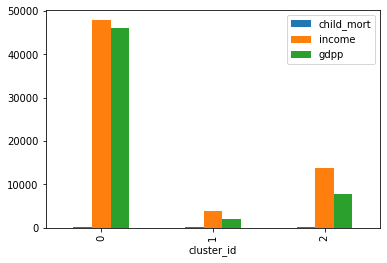

In [35]:
kmean_prediction[['child_mort', 'income', 'gdpp', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

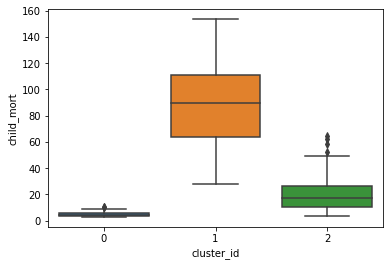

In [36]:
sns.boxplot(x = 'cluster_id', y='child_mort', data=kmean_prediction)

### From the above plots, we confirm that that,
- cluster 0: High gdpp, High income, low child_mort
- cluster 1: Low gdpp, Low income, high child_mort
- cluster 2: Medium gdpp, Medium income, low child_mort

### Since cluster 1 countries have low income, low gdpp and high child_mort, they require urgent financial help

#### sorting the countries in cluster 1 as per business requirement

In [37]:
#ascending gdpp and income, but descending child_mort
sorted_country = kmean_prediction[kmean_prediction['cluster_id'] == 1].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=[True, True, False])
sorted_country.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,1
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,1
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,1
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,1
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,1
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,1
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,1
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.01,47.5,5.2100,446.00,1
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,1
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.60,61.7,4.6100,482.00,1


# Hierarchical clustering

In [38]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [39]:
country_data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


### Single linkage

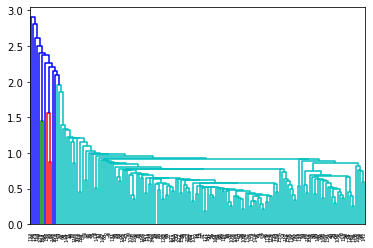

In [40]:
single_linkage = linkage(country_data_scaled, method='single', metric='euclidean')
dendrogram(single_linkage)
plt.show()

Interpreting results form simple linkage is quite complex, hence, using complete linkage

### Complete linkage

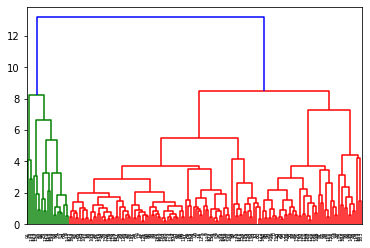

In [41]:
complete_linkage = linkage(country_data_scaled, method='complete', metric='euclidean')
dendrogram(complete_linkage)
plt.show()

#### Judging the by height of dendrogram, optimum number of clusters seems like 2
#### But if we divide the dataset in 2 clusters, we will get clusters with high valued data points and low valued data points, average valued data points might get assigned wrong cluster. Since, the business requirement requires cluster of backward countries hence, clustering should be specific. Hence, using 4 as number of clusters  

In [42]:
#creating 2 clusters using cut-tree
cluster_labels = cut_tree(complete_linkage, n_clusters = 4).reshape(-1)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [43]:
hierarchial_prediction = country_data.copy()

#assigning cluster_id to each country
hierarchial_prediction['cluster_id'] = cluster_labels

hierarchial_prediction.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [44]:
hierarchial_prediction['cluster_id'].value_counts()

1    96
0    50
2    18
3     3
Name: cluster_id, dtype: int64

### Visualising the clusters

#### using child_mort, income and gdpp

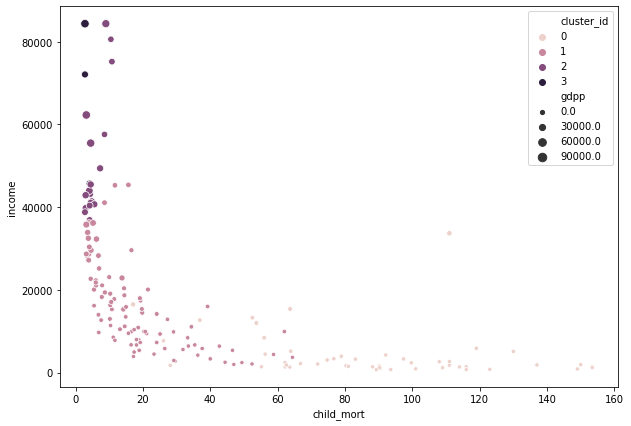

In [45]:
plt.figure(figsize=[10,7])
sns.scatterplot(x = 'child_mort', y = 'income', size = 'gdpp', hue = 'cluster_id', data = hierarchial_prediction)
plt.show()

### From the above plots, it is evident that,
- cluster 0: Low gdpp, Lowest income, highest child_mort 
- cluster 1: low gdpp, low income, high child_mort
- cluster 2: average gdpp, average income, low child_mort
- cluster 3: High gdpp, High income, low child_mort

### Cluster profiling

#### using child_mort, income and gdpp

In [46]:
hierarchial_prediction[['child_mort', 'income', 'gdpp', 'cluster_id']].groupby('cluster_id').mean()

,child_mort,income,gdpp
cluster_id,,,
0,87.586000,4229.169600,2157.944800
1,19.188542,15438.333333,9849.187500
2,5.494444,51093.000000,50149.333333
3,3.266667,67391.333333,58129.333333


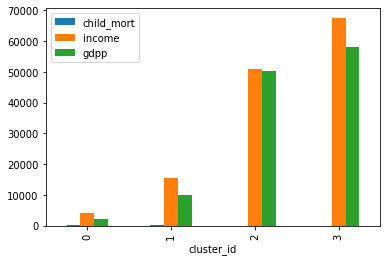

In [47]:
hierarchial_prediction[['child_mort', 'income', 'gdpp', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

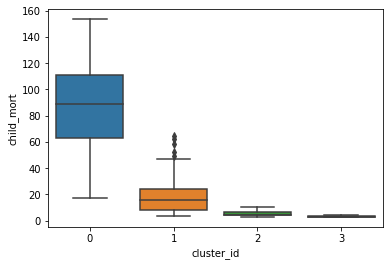

In [48]:
sns.boxplot(x = 'cluster_id', y='child_mort', data=hierarchial_prediction)

### From the above plots, we confirm that that,
- cluster 0: Low gdpp, Lowest income, highest child_mort 
- cluster 1: low gdpp, low income, high child_mort
- cluster 2: average gdpp, average income, low child_mort
- cluster 3: High gdpp, High income, low child_mort

### Since cluster 0 countries have low income, low gdpp and high child_mort, they require urgent financial help

#### sorting the countries in cluster 0 as per business requirement

In [49]:
#ascending gdpp and income, but descending child_mort
sorted_country = hierarchial_prediction[hierarchial_prediction['cluster_id'] == 0].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=[True, True, False])
sorted_country.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,0
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,0
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,0
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,0
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,0
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,0
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.01,47.5,5.2100,446.00,0
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,0
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.60,61.7,4.6100,482.00,0


# Inferences

K-means and hierarchical clustering produce similar results but the clusters are more clean in the case of K-means clustering. The cluster boundaries are smooth and there is less over-lapping of data points. Hence, we conclude that K-means is a slightly better option for countries. Neverthless, the results produced by K-means and hierarchical clustering as same. Hence, both these methods are equally valid and significant in narrowing down the countries that are in dire need to financial help.

There contries are:- 
1. Liberia
2. Burundi
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

All the above mentioned countries have low gdpp, low income and high child mortality

### Choosing countries on basis of some socio-economic and health factors

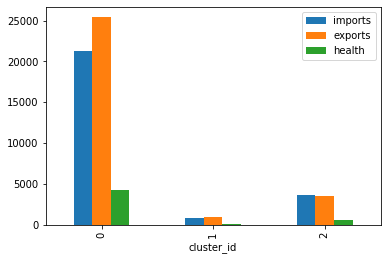

In [50]:
kmean_prediction[['imports', 'exports', 'health', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

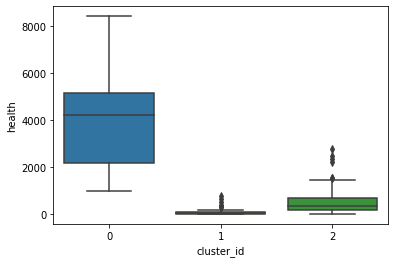

In [51]:
sns.boxplot(x = 'cluster_id', y='health', data=kmean_prediction)

### From the above plots, we confirm that that,
- cluster 0: High imports, High exports, High health 
- cluster 1: low imports, low exports, Low health
- cluster 2: average imports, average exports, low health

In [52]:
#sorting on health ascending, imports descending and export ascending in kmeans prediction
sorted_socio_eco = kmean_prediction[kmean_prediction['cluster_id'] == 1].sort_values(by=['health', 'imports', 'exports'], ascending=[True, False, True])
sorted_socio_eco.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.790,60.8,4.6000,413.00,1
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.600,61.7,4.6100,482.00,1
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.010,47.5,5.2100,446.00,1
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.550,58.8,6.5636,348.00,1
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.640,54.5,5.5600,419.00,1
116,Pakistan,92.1,140.400000,22.880000,201.76000,4280.00,10.900,65.3,3.8500,1040.00,1
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.800,57.5,6.5400,334.00,1
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.300,57.7,6.2600,331.62,1
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.100,53.1,5.3100,459.00,1
17,Benin,111.0,180.404000,31.078000,281.97600,1820.00,0.885,61.8,5.3600,758.00,1


Based upon the results, following will be countries that require financial aid if we decide to cluster them based upon socio economic factors. The following countries have low health, low exports:

1. Madagascar
2. Eritrea
3. Central African Republic
4. Niger
5. Mozambique

# Thank you